In [1]:
# Import necessary classes
from utils.graphics.Image import Image
from utils.graphics.Point import Point
from digitization.Preprocessorv2 import Preprocessor 

In [2]:
import copy
import io
from os.path import splitext
from typing import Iterable, Sequence, Tuple
import cv2 as cv
import numpy as np
from pdf2image import convert_from_path
from pdf2image.exceptions import PDFPageCountError
from utils.graphics.ColorSpace import ColorSpace
from utils.graphics.Point import Point
from utils.graphics.Rectangle import Rectangle

class CustomImage:
    """
    A class that combines the functionalities of the original CustomImage and Image classes.
    """

    def __init__(self, array: np.ndarray = None, path: str = None) -> None:
        """
        Initialization of the image, either from an array or from a path.

        Args:
            array (np.ndarray): Numpy array containing the image data.
            path (str): Path to the image file.

        Raises:
            TypeError: If array is not a numpy array.
            FileNotFoundError: If the file does not exist.
        """
        self.__color_space = ColorSpace.BGR
        self.__data = None

        if array is not None:
            if isinstance(array, np.ndarray):
                self.__data = array
            else:
                raise TypeError("Expected a numpy.ndarray object")
        elif path is not None:
            _, file_extension = splitext(path)
            pdf_except = False
            if file_extension == ".pdf":
                try:
                    buffer = io.BytesIO()
                    pdf = convert_from_path(path)
                    pdf[0].save(buffer, format="png")
                    buffer.seek(0)
                    img_arr = np.frombuffer(buffer.getvalue(), dtype=np.uint8)
                    buffer.close()
                    self.__data = cv.imdecode(img_arr, cv.IMREAD_COLOR)
                except PDFPageCountError:
                    pdf_except = True
            else:
                self.__data = cv.imread(path)
            if self.__data is None or pdf_except:
                raise FileNotFoundError(f'File "{path}" does not exist')
        else:
            raise ValueError("Either array or path must be provided")

    def __getitem__(self, index: Sequence) -> Iterable[Iterable[int | Iterable[int]]]:
        return self.__data[index]

    def __setitem__(self, index: Sequence, value: Iterable[Iterable[int | Iterable[int]]]) -> None:
        self.__data[index] = value

    @property
    def data(self) -> Iterable[Iterable[int | Iterable[int]]]:
        return self.__data

    @data.setter
    def data(self, data: Iterable[Iterable[int | Iterable[int]]]) -> None:
        self.__data = data

    @property
    def height(self) -> int:
        return self.__data.shape[0]

    @property
    def width(self) -> int:
        return self.__data.shape[1]

    @property
    def white(self) -> int | Tuple[int, int, int]:
        if self.__color_space == ColorSpace.GRAY:
            return 255
        if self.__color_space == ColorSpace.HSV:
            return [0, 0, 255]
        return [255, 255, 255]

    @property
    def black(self) -> int | Tuple[int, int, int]:
        if self.__color_space == ColorSpace.GRAY:
            return 0
        return [0, 0, 0]
    

    @property
    def array(self):
        return self.data  # Assuming self.data is your image's numpy array.

    def copy(self) -> 'CustomImage':
        return copy.deepcopy(self)

    def save(self, path: str) -> None:
        self.to_BGR()
        cv.imwrite(path, self.__data)

    def crop(self, r: Rectangle) -> None:
        tl = r.top_left
        br = r.bottom_right
        self.__data = self.__data[tl.y : br.y, tl.x : br.x]

    def threshold(self, thres: int, value: int) -> None:
        _, self.__data = cv.threshold(self.__data, thres, value, cv.THRESH_BINARY)
        self.to_GRAY()

    def line(self, p1: Point, p2: Point, color: Tuple[int, int, int], thickness: int):
        cv.line(self.__data, (p1.x, p1.y), (p2.x, p2.y), color, thickness=thickness)

    def is_GRAY(self) -> bool:
        return self.__color_space == ColorSpace.GRAY

    def is_BGR(self) -> bool:
        return self.__color_space == ColorSpace.BGR

    def is_RGB(self) -> bool:
        return self.__color_space == ColorSpace.RGB

    def is_HSV(self) -> bool:
        return self.__color_space == ColorSpace.HSV

    def to_GRAY(self) -> None:
        if self.is_RGB():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_RGB2GRAY)
        elif self.is_BGR():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_BGR2GRAY)
        elif self.is_HSV():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_HSV2GRAY)
        self.__color_space = ColorSpace.GRAY

    def to_BGR(self) -> None:
        if self.is_GRAY():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_GRAY2BGR)
        elif self.is_RGB():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_RGB2BGR)
        elif self.is_HSV():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_HSV2BGR)
        self.__color_space = ColorSpace.BGR

    def to_RGB(self) -> None:
        if self.is_GRAY():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_GRAY2RGB)
        elif self.is_BGR():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_BGR2RGB)
        elif self.is_HSV():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_HSV2RGB)
        self.__color_space = ColorSpace.RGB

    def to_HSV(self) -> None:
        if self.is_GRAY():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_GRAY2HSV)
        elif self.is_BGR():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_BGR2HSV)
        elif self.is_RGB():
            self.__data = cv.cvtColor(self.__data, cv.COLOR_RGB2HSV)
        self.__color_space = ColorSpace.HSV


## Single file test

## Sort the aligned leads (Works perfect for 100 and 108)

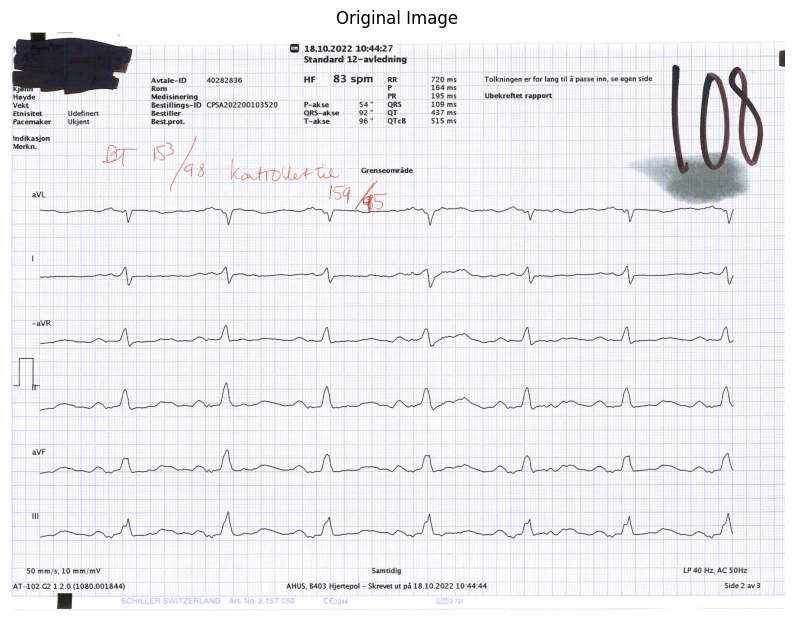

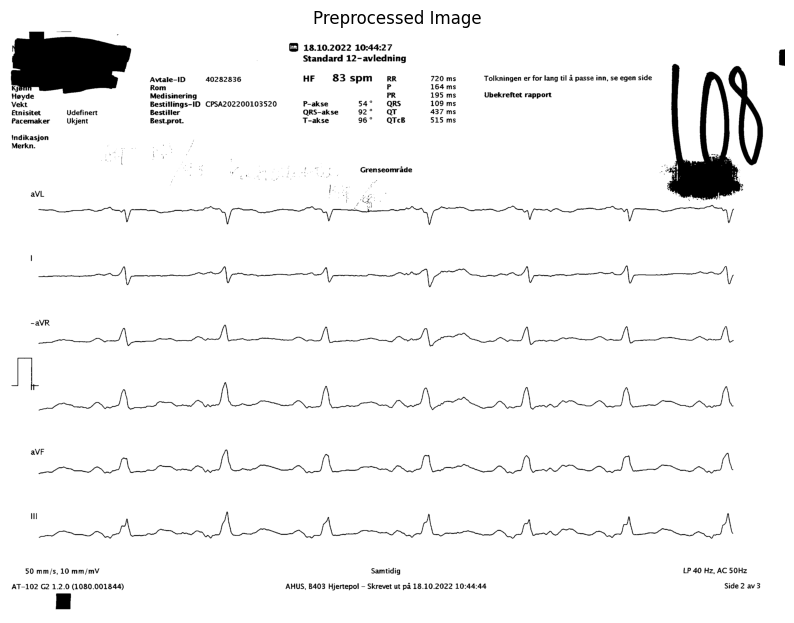

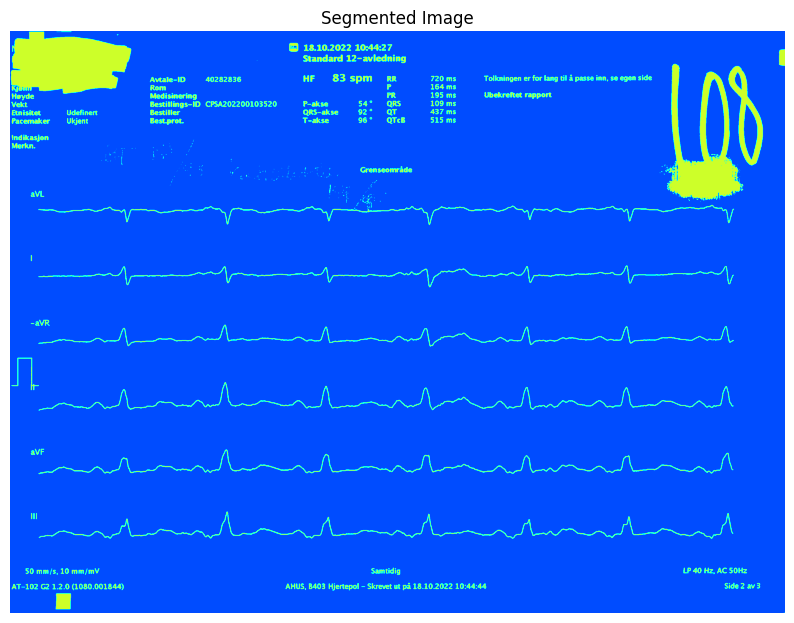

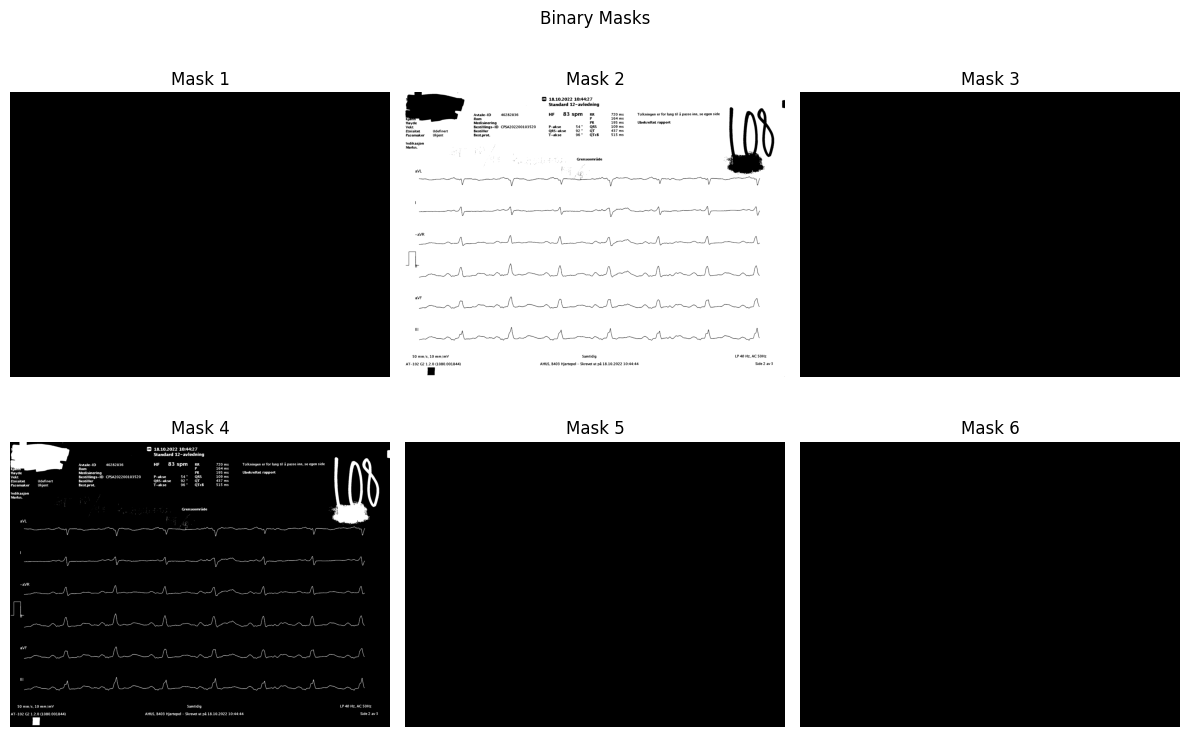

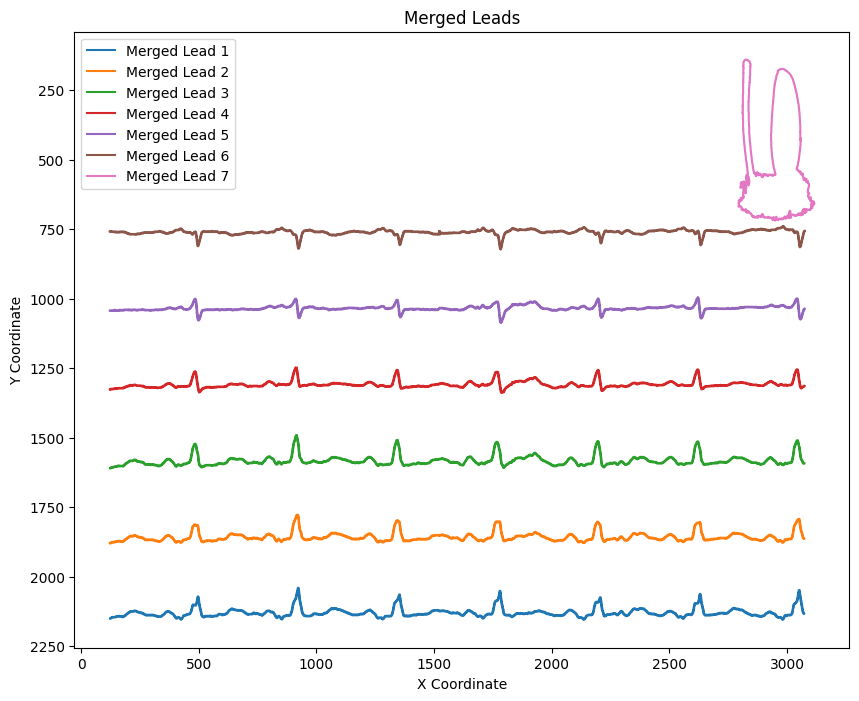

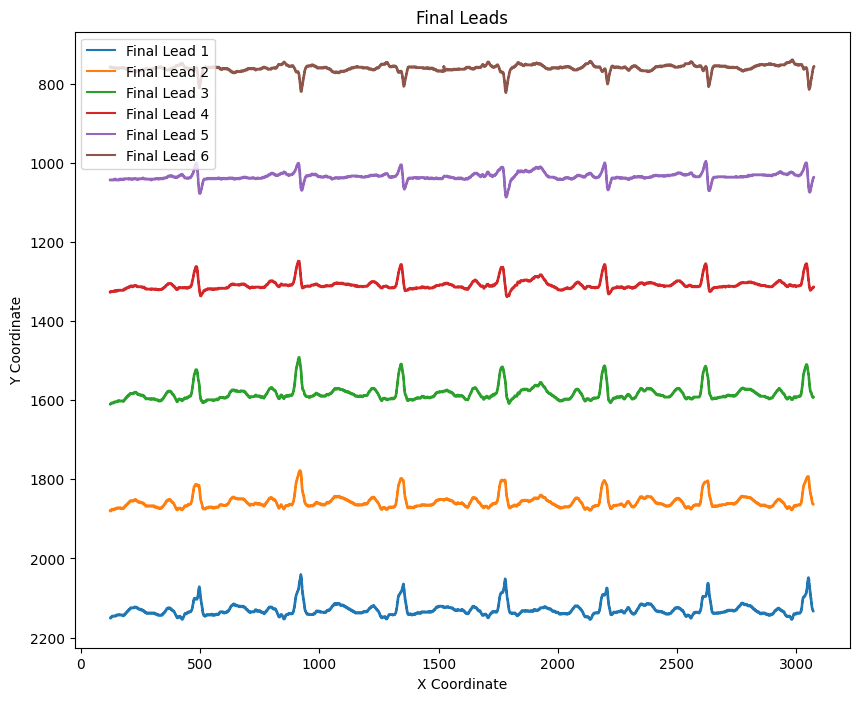

d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:653: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
d:\OsloMet\AI Mind Research\DL ECG Digitization Li and miner\joenv\lib\site-packages\scipy\interpolate\_interpolate.py:656: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


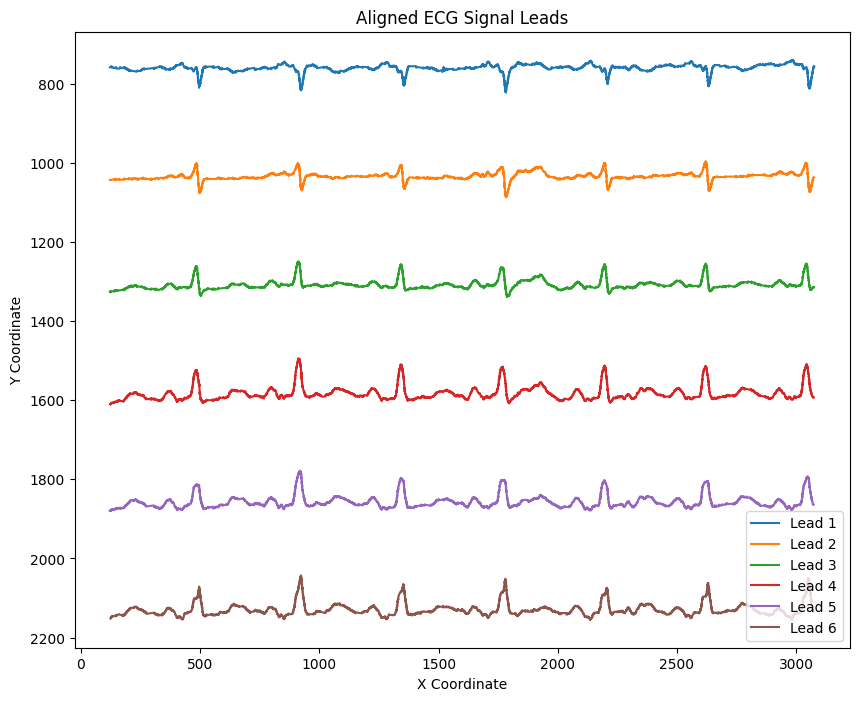

Time and amplitude values have been saved to ecg_time_amplitude.csv
Amplitude values have been saved to ecg_leads.csv


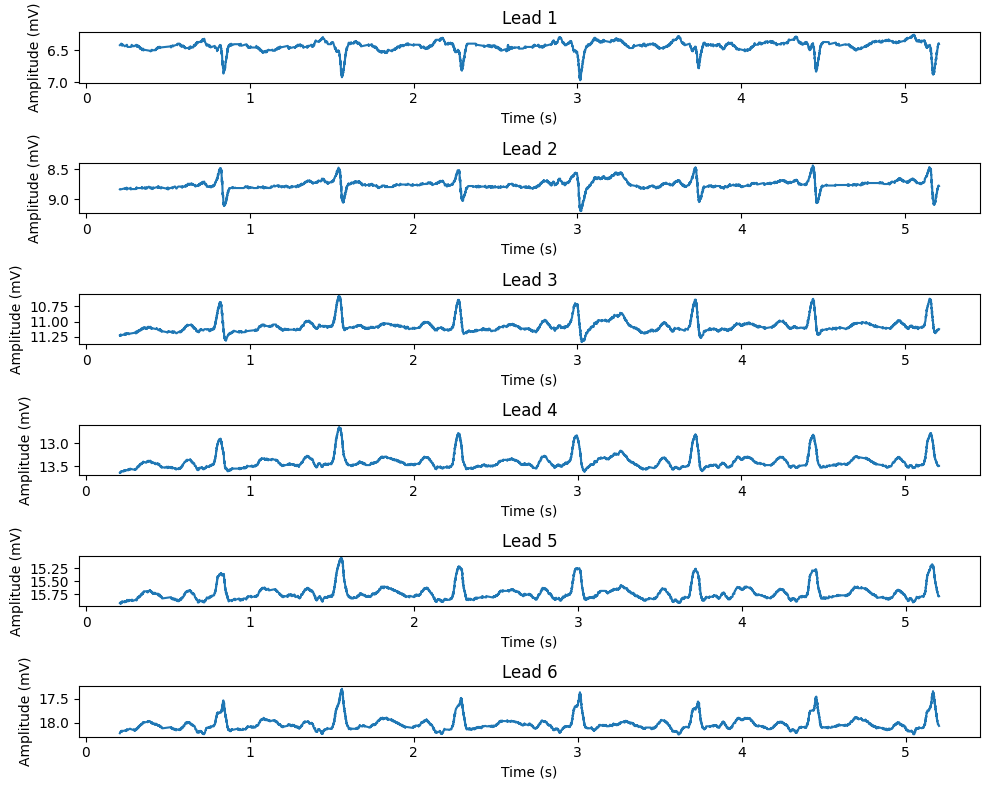

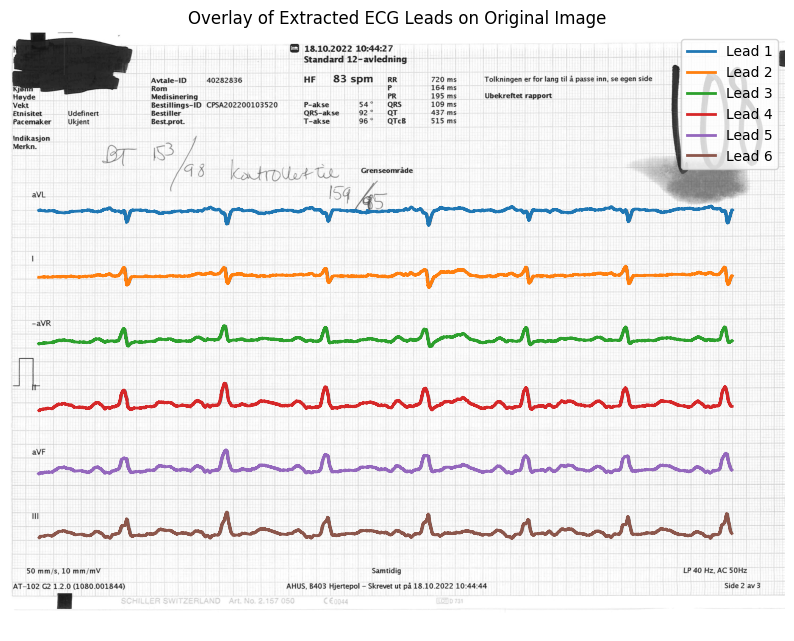

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import sys
from scipy import ndimage  # Make sure to import ndimage for `find_objects`

# Helper function to plot images
def plot_image(image, title, cmap='gray'):
    plt.figure(figsize=(10, 8))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()



def align_leads(contour_coords, num_points=5000):
    aligned_coords = []
    for coords in contour_coords:
        x = coords[:, 0]
        y = coords[:, 1]
        f_interp = interp1d(x, y, kind='linear', fill_value="extrapolate")
        x_new = np.linspace(x.min(), x.max(), num_points)
        y_new = f_interp(x_new)
        aligned_coords.append(np.column_stack((x_new, y_new)))
    return aligned_coords





def plot_aligned_coordinates(aligned_coords):
    plt.figure(figsize=(10, 8))
    
    # Reverse the order of aligned leads to match top-to-bottom ordering
    for i, coords in enumerate(reversed(aligned_coords)):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Lead {i+1}')
    
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.title('Aligned ECG Signal Leads')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()


def apply_kmeans(image, n_clusters=6):
    Z = image.reshape((-1, 1))  # Flatten the image
    Z = np.float32(Z)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv.kmeans(Z, n_clusters, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    segmented_image = labels.reshape((image.shape))
    return segmented_image, centers

def create_binary_masks(segmented_image, n_clusters):
    binary_masks = [(segmented_image == i).astype(np.uint8) * 255 for i in range(n_clusters)]
    return binary_masks

def extract_contour_coordinates(binary_masks):
    contour_coordinates = []
    for mask in binary_masks:
        contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            coords = contour[:, 0, :]  # Extract x and y coordinates
            contour_coordinates.append(coords)
    return contour_coordinates

def resample_contour(contour, num_points=100):
    x = contour[:, 0]
    y = contour[:, 1]
    f_interp = interp1d(np.arange(len(x)), x, kind='linear', fill_value="extrapolate")
    x_new = np.linspace(0, len(x) - 1, num_points)
    x_resampled = f_interp(x_new)
    f_interp = interp1d(np.arange(len(y)), y, kind='linear', fill_value="extrapolate")
    y_resampled = f_interp(x_new)
    return np.column_stack((x_resampled, y_resampled))

def compare_gradients(contour1, contour2, threshold=0.5, num_points=100):
    # Resample contours
    contour1_resampled = resample_contour(contour1, num_points)
    contour2_resampled = resample_contour(contour2, num_points)
    
    # Calculate gradients for each contour
    gradient1 = np.diff(contour1_resampled, axis=0)
    gradient2 = np.diff(contour2_resampled, axis=0)

    # Calculate mean squared difference between gradients
    mse = np.mean((gradient1 - gradient2) ** 2, axis=0)

    # Return True if all MSE values are below the threshold
    return np.all(mse < threshold)

def filter_and_merge_leads(contour_coords, min_size=1000, y_threshold=10, gradient_threshold=0.5):
    large_contours = [coords for coords in contour_coords if len(coords) > min_size]

    merged_leads = []
    current_lead = []
    for i, coords in enumerate(large_contours):
        if not current_lead:
            current_lead.append(coords)
            continue

        if np.abs(coords[:, 1].mean() - current_lead[0][:, 1].mean()) < y_threshold and compare_gradients(coords, current_lead[0], gradient_threshold):
            current_lead.append(coords)
        else:
            merged_leads.append(np.vstack(current_lead))
            current_lead = [coords]
    if current_lead:
        merged_leads.append(np.vstack(current_lead))

    return merged_leads

def enforce_six_leads_by_start_points(merged_coords):
    # If there are six or fewer leads, return them as is
    if len(merged_coords) <= 6:
        return merged_coords
    
    # Calculate the ranges for each lead
    lead_ranges = [(i, coords[:, 0].max() - coords[:, 0].min()) for i, coords in enumerate(merged_coords)]
    lead_ranges.sort(key=lambda x: x[1], reverse=True)  # Sort by range in descending order
    
    # Select the top 6 leads based on the range
    selected_indices = [i for i, _ in lead_ranges[:6]]
    
    # Return the selected leads while preserving the original order
    selected_coords = [merged_coords[i] for i in sorted(selected_indices)]
    
    return selected_coords


def plot_time_amplitude_single_column(time_amplitude_df):
    plt.figure(figsize=(10, 8))  # Adjusted for a 6x1 layout
    
    # Ensure lead order matches the plotting of aligned coordinates
    num_leads = 6
    for i in range(num_leads):
        time_col = f'Lead_{i+1}_time'
        amp_col = f'Lead_{i+1}_amplitude'
        plt.subplot(num_leads, 1, i + 1)
        plt.plot(time_amplitude_df[time_col], time_amplitude_df[amp_col])
        plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates

        plt.title(f'Lead {i + 1}')  # Correct lead title
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (mV)')
    
    plt.tight_layout()
    plt.show()


def plot_time_amplitude_overlay(image_path, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y):
    # Load the original image
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

    # Plot the original ECG image
    plt.imshow(image, cmap='gray')
    
    # Conversion factors (inverse of what was used to convert from pixels to time/amplitude)
    pixel_per_time = pixels_per_mm_x * 50  # 50 mm = 1 second
    pixel_per_amplitude = pixels_per_mm_y * 10  # 10 mm = 1 mV

    # Overlay each lead in a 6x1 layout
    for i in range(1, 7):
        time_col = f'Lead_{i}_time'
        amp_col = f'Lead_{i}_amplitude'
        
        # Convert time and amplitude back to pixel coordinates
        x_pixels = time_amplitude_df[time_col] * pixel_per_time
        y_pixels = time_amplitude_df[amp_col] * pixel_per_amplitude

        plt.plot(x_pixels, y_pixels, label=f'Lead {i}', linewidth=2)  # Plot each lead
        
    plt.title('Overlay of Extracted ECG Leads on Original Image')
    plt.xlabel('Time (pixels)')
    plt.ylabel('Amplitude (pixels)')
    plt.legend()
    plt.axis('off')  # Hide axis since we're overlaying on an image
    plt.show()


# Function to extract time and amplitude from aligned leads
def extract_time_amplitude(aligned_leads, pixels_per_mm_x, pixels_per_mm_y):
    lead_data = {}

    # Conversion factors
    time_per_pixel = 1 / (pixels_per_mm_x * 50)  # 50 mm = 1 second
    amplitude_per_pixel = 1 / (pixels_per_mm_y * 10)  # 10 mm = 1 mV

    # Reverse the order of aligned leads to match top-to-bottom ordering
    aligned_leads = list(reversed(aligned_leads))

    for i, lead in enumerate(aligned_leads):
        time_values = lead[:, 0] * time_per_pixel  # Convert x-coordinates to time
        amplitude_values = lead[:, 1] * amplitude_per_pixel  # Convert y-coordinates to amplitude
        lead_data[f'Lead_{i+1}_time'] = time_values
        lead_data[f'Lead_{i+1}_amplitude'] = amplitude_values
    
    return pd.DataFrame(lead_data)



def plot_binary_masks(binary_masks):
    num_masks = len(binary_masks)
    cols = 3
    rows = (num_masks + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    axes = axes.flatten()

    plt.suptitle('Binary Masks')
    
    for i, mask in enumerate(binary_masks):
        axes[i].imshow(mask, cmap='gray')
        axes[i].set_title(f'Mask {i+1}')
        axes[i].axis('off')

    for j in range(num_masks, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_contour_coordinates(contour_coords):
    plt.figure(figsize=(10, 8))
    plt.title('Contour Coordinates')

    for i, coords in enumerate(contour_coords):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Contour {i+1}')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.legend()
    plt.show()

def plot_merged_leads(merged_leads):
    plt.figure(figsize=(10, 8))
    plt.title('Merged Leads')

    for i, coords in enumerate(merged_leads):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Merged Lead {i+1}')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.legend()
    plt.show()

def plot_final_leads(final_leads):
    plt.figure(figsize=(10, 8))
    plt.title('Final Leads')

    for i, coords in enumerate(final_leads):
        plt.plot(coords[:, 0], coords[:, 1], label=f'Final Lead {i+1}')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.legend()
    plt.show()
    
# Main processing function
def process_ecg_image(image_path):

    # Step 1: Load the image
    image = cv.imread(image_path)
    if image is None:
        print('Cannot open image: ' + image_path)
        sys.exit(0)

    plot_image(image, 'Original Image')

    # Convert the image to a custom Image class
    img_obj = CustomImage(image)

    # Initialize Preprocessor
    preprocessor = Preprocessor()

    # Apply preprocessing
    preprocessed_img_obj, rect = preprocessor.preprocess(img_obj)
    
    # Convert the preprocessed image back to numpy array
    preprocessed_image = preprocessed_img_obj.array

    # Plot the preprocessed image
    plot_image(preprocessed_image, 'Preprocessed Image')

    # Apply k-means clustering
    segmented_image, centers = apply_kmeans(preprocessed_image, n_clusters=6)
    plot_image(segmented_image, "Segmented Image", cmap='jet')

    # Create binary masks and extract contours
    binary_masks = create_binary_masks(segmented_image, n_clusters=6)
    plot_binary_masks(binary_masks)  # Plot binary masks
    
    contour_coords = extract_contour_coordinates(binary_masks)
    # plot_contour_coordinates(contour_coords)  # Plot contour coordinates

    # Filter, merge, and align leads
    merged_leads = filter_and_merge_leads(contour_coords)
    plot_merged_leads(merged_leads)  # Plot merged leads

    final_leads = enforce_six_leads_by_start_points(merged_leads)
    plot_final_leads(final_leads)  # Plot final leads

    # Align leads and sort them from top to bottom
    aligned_leads = align_leads(final_leads, num_points=5000)  # Adjust num_points as needed

    # Plot the aligned ECG leads
    plot_aligned_coordinates(aligned_leads)

    # Example usage with calculated pixel scaling factors
    # DPI stands for "dots per inch," and it measures the resolution of an image or output device.
    # 1 inch is equal to 25.4 millimeters.
    # Since we used 300 DPI, this means there are 300 pixels per inch.
    # Pixels_per_mm= DPI/25.4 =300/25.4 ≈ 11.81 pixels_per_mm
    pixels_per_mm_x = 11.81
    pixels_per_mm_y = 11.81  

    # Extract time and amplitude values for each lead
    time_amplitude_df = extract_time_amplitude(aligned_leads, pixels_per_mm_x, pixels_per_mm_y)
    output_csv_path = 'ecg_time_amplitude.csv'
    time_amplitude_df.to_csv(output_csv_path, index=False)
    print(f"Time and amplitude values have been saved to {output_csv_path}")

    # Save the amplitude values only to a new CSV file
    amplitude_df = time_amplitude_df.filter(like='_amplitude')
    amplitude_csv_path = 'ecg_leads.csv'
    amplitude_df.to_csv(amplitude_csv_path, index=False, header=True)
    print(f"Amplitude values have been saved to {amplitude_csv_path}")

    # Plot each lead's time vs. amplitude with 6 rows and 1 column
    plot_time_amplitude_single_column(time_amplitude_df)
    plot_time_amplitude_overlay(image_path, time_amplitude_df, pixels_per_mm_x, pixels_per_mm_y)


    return aligned_leads, time_amplitude_df

# Example usage
image_path = r'../rotated_data_png/108_F_page_1.png'

aligned_leads, time_amplitude_df = process_ecg_image(image_path)



## Validation

PCC Results:
                Lead       PCC
0  Lead_1_amplitude -0.567924
1  Lead_2_amplitude -0.459153
2  Lead_3_amplitude -0.597536
3  Lead_4_amplitude  0.923092
4  Lead_5_amplitude  0.693503
5  Lead_6_amplitude -0.946929
RMSE Results:
                Lead        RMSE
0  Lead_1_amplitude  432.806121
1  Lead_2_amplitude  758.187696
2  Lead_3_amplitude  773.137606
3  Lead_4_amplitude  510.970303
4  Lead_5_amplitude  534.668490
5  Lead_6_amplitude  682.422704


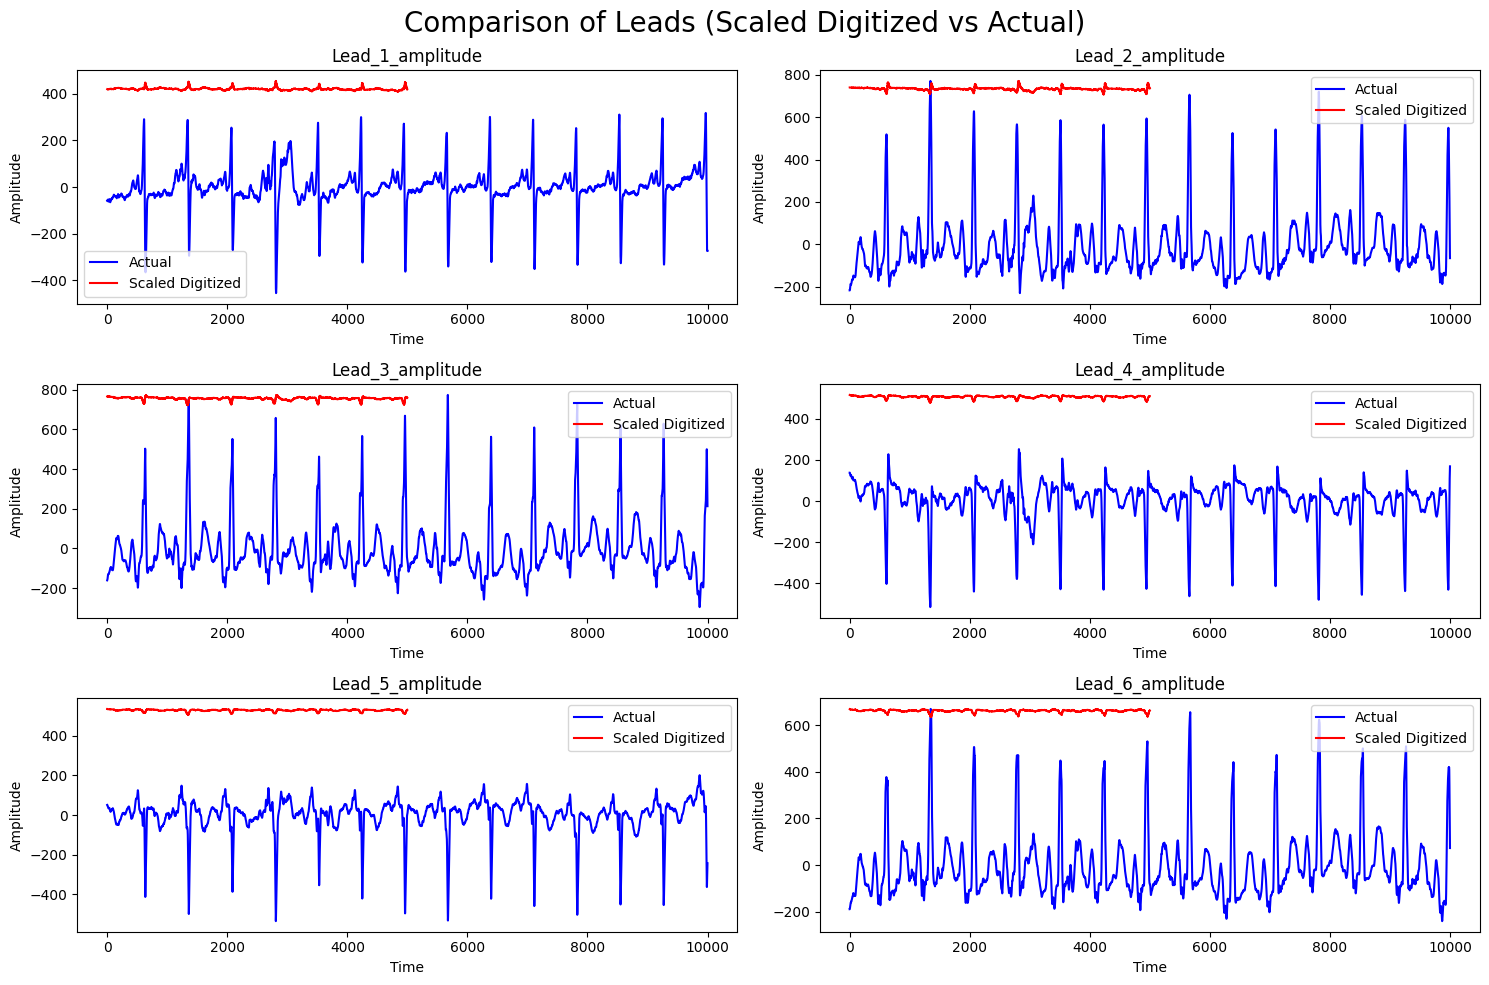

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Define the necessary functions
def pcc(y_true, y_pred):
    """Calculate Pearson Correlation Coefficient."""
    return y_true.corr(y_pred)

def rmse(y_true, y_pred):
    """Calculate Root Mean Squared Error."""
    return sqrt(np.mean((y_true - y_pred) ** 2))

# File paths
digitized_file_path = r"ecg_leads.csv"  # Path to your digitized data file
actual_file_path = r"D:\OsloMet\AI Mind Research\NewData-ECG_ForJaya\20230519_data\train_oslmet\20230427-120222.630823_new.csv"  # Path to your actual data file

# Load the data
digitized_df = pd.read_csv(digitized_file_path)
actual_df = pd.read_csv(actual_file_path)

# Leads to validate
leads_to_validate = [f'Lead_{i}_amplitude' for i in range(1, 7)]  # Lead_1 to Lead_6

# Initialize lists for storing results
pcc_results = []
rmse_results = []

# Determine the scaling factors
scaling_factors = {}
for lead in leads_to_validate:
    if lead not in actual_df.columns or lead not in digitized_df.columns:
        print(f"Warning: Lead '{lead}' is missing in one of the files.")
        continue

    actual_max = actual_df[lead].abs().max()  # Maximum absolute value in the actual data
    digitized_max = digitized_df[lead].abs().max()  # Maximum absolute value in the digitized data

    # Avoid division by zero
    if digitized_max == 0:
        scaling_factors[lead] = 1
    else:
        scaling_factors[lead] = actual_max / digitized_max

# Apply scaling to digitized data
digitized_df_scaled = digitized_df.copy()
for lead, factor in scaling_factors.items():
    digitized_df_scaled[lead] *= factor

# Calculate PCC and RMSE for each lead
for lead in leads_to_validate:
    if lead not in actual_df.columns or lead not in digitized_df_scaled.columns:
        continue

    y_true = actual_df[lead]
    y_pred = digitized_df_scaled[lead]

    # Calculate metrics
    pcc_value = pcc(y_true, y_pred)
    rmse_value = rmse(y_true, y_pred)

    # Append results to lists
    pcc_results.append({'Lead': lead, 'PCC': pcc_value})
    rmse_results.append({'Lead': lead, 'RMSE': rmse_value})

# Convert lists to DataFrames
pcc_df = pd.DataFrame(pcc_results)
rmse_df = pd.DataFrame(rmse_results)

# Print the results
print("PCC Results:\n", pcc_df)
print("RMSE Results:\n", rmse_df)

# Visualization
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle("Comparison of Leads (Scaled Digitized vs Actual)", fontsize=20)

for i, lead in enumerate(leads_to_validate):
    if lead not in actual_df.columns or lead not in digitized_df_scaled.columns:
        continue

    y_true = actual_df[lead]
    y_pred = digitized_df_scaled[lead]

    ax = axs[i // 2, i % 2]
    ax.plot(y_true, label='Actual', color='blue')
    ax.plot(y_pred, label='Scaled Digitized', color='red')
    ax.set_title(lead)
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.legend()

plt.tight_layout()
plt.show()
